# Ali Foroozmand
# Homework 5 


## $\chi^2$ Distribution

### A random variable $X$ has a *gamma distribution* with parameters $\alpha > 0$ and $\beta > 0$ if $X$ has a pdf

\begin{equation}
f_X(x) = 
\begin{cases}
\frac{1}{\beta^{\alpha}\Gamma(\alpha)} x^{\alpha - 1}e^{-\frac{x}{\beta}} & \text{if }x>0; \\
0 & \text{otherwise.}
\end{cases}
\end{equation}

### In this case we write $X \approx \gamma(\alpha,\beta)$.

### The $\chi^2$ distribution is a particular member of the gamma family distribution. In terms of a parametric value $\nu$ called degrees of freedom, a random variable $X$ is said to have a $\chi ^2$ distribution with $\nu$ degrees of freedom if $X \approx \gamma(\frac{1}{2}\nu,2)$. In this case we write $X \approx \chi^2_{\nu}$.

![alt](chi2dist.png)

### Question 1: Make a similar plot that shows the distributions: $\chi^2_1$, $\chi^2_2$, $\chi^2_3$, $\chi^2_4$. 

### *Hint: Use the following information to help you do the plots: if $Z_1,....,Z_k$ are independent standard normal random variables, then the sum of their squares, $$Q = \sum^k_{i=1} Z^2_i,$$ is distributed according to the $\chi ^2$ distribution with $k$ degrees of freedom. This is usually denoted as $$Q \approx \chi^2_k.$$ The chi-squared distribution has one parameter, $k$ , a positive integer that specifies the number of degrees of freedom (i.e. the number of $Z_i$'s).*

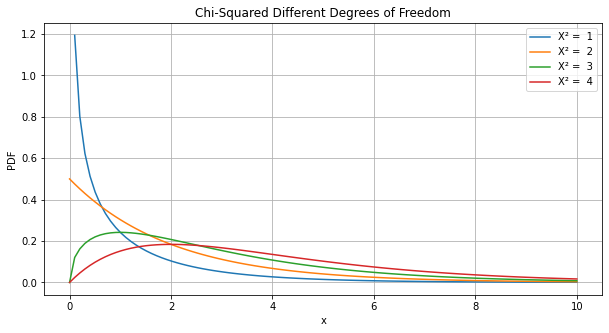

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
from scipy.stats import chi2
np.random.seed(0)


degree = [1, 2, 3, 4] 
x = np.linspace(0, 10, 100)


plt.figure(figsize=(10, 5))
for i in degree:
    plt.plot(x, chi2.pdf(x, i), label=f"X² =  {i}")


plt.title("Chi-Squared Different Degrees of Freedom")
plt.xlabel("x")
plt.ylabel("PDF")
plt.legend()
plt.grid()
plt.show()


### Second solution:

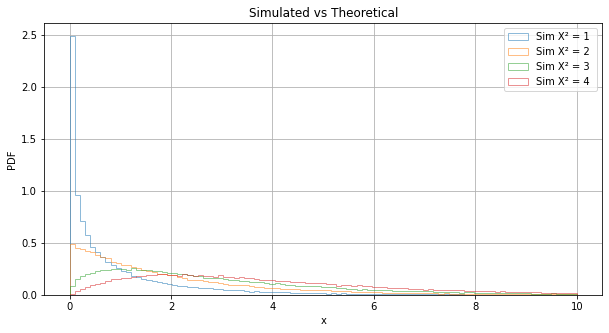

In [2]:
N = int (1e5)
degree = [1, 2, 3, 4] 
bins = np.linspace(0, 10, 100)  

plt.figure(figsize=(10, 5))


for i in degree:
    Z = np.random.normal(size=(N,i))
    Q = np.sum(Z**2, axis=1)
    plt.hist(Q, bins=bins, density=True, alpha=0.5, label=f"Sim X² = {i} ", histtype = "step" )


plt.title("Simulated vs Theoretical")
plt.xlabel("x")
plt.ylabel("PDF")
plt.legend()
plt.grid()
plt.show()


### Third solution:

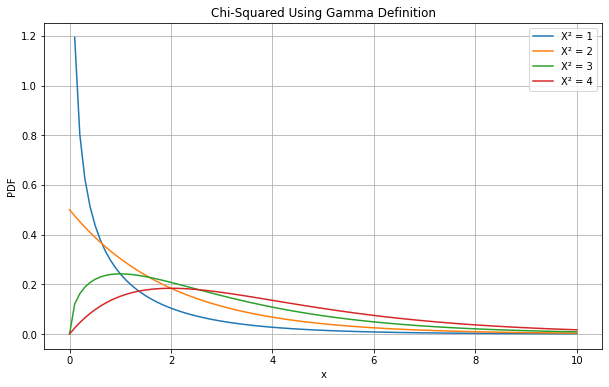

In [3]:
from scipy.stats import gamma

plt.figure(figsize=(10, 6))

# Compute and plot the gamma-based chi-squared distributions
for i in degree:
    alpha = i / 2  # Shape parameter
    beta = 2  # Scale parameter
    # Plot gamma distribution equivalent to chi-squared
    plt.plot(x, gamma.pdf(x, a=alpha, scale=beta), label=f"X² = {i}")

# Add plot details
plt.title("Chi-Squared Using Gamma Definition")
plt.xlabel("x")
plt.ylabel("PDF")
plt.legend()
plt.grid()
plt.show()


## $\chi ^2$ - test statistic

### A *statistic* is a characteristic of a sample. We usually use it to estimate the value of a population parameter. 

### Imagine we select a random sample of 50 cows from a farm with 100 cows. The average weight of the selected cows would be an example of a statistic, as well as any other measurable quantity.

### In particular, the $\chi^2$ statistic from a sample is calculated with the following formula:

\begin{equation}
\chi^2 = \sum^j_{i=1} (O_i-E_i)^2/E_i
\end{equation}

### where $O_i$ is the observed frequency of an $i^{th}$ outcome, and $E_i$ is the expected frequency of the $i^{th}$ outcome if the null hypothesis $H_0$ is true. The number $j$ is the possible number of outcomes.

### For example, in a coin flipping experiment, there are 2 possible outcomes: Head or tail. Therefore, $j=2$ and the experiment has by definition 1 degree of freedom. (DoF = $j-1$ since the number of tails is not independent from the number of heads).

### Question 1: Make a python routine, using a  $\chi ^2$ - test to solve the following problem.

### We wish to test if attending lectures is independent of passing or failing a class. We have the following numbers from a class of 54 students.

|  | Pass | Fail |
|:-:|:-:|:-:|
| Attended | 25 | 6  |
| Skipped | 8 | 15 |

### Which is the null hypothesis in this case?

### $H_0$ =  Attending lectures is independent of passing or failing a class.

### Question 2: Using a $\chi ^2$ - test, calculate the p-value of the observations and using a significance level $\alpha = 0.05$ , reject or fail to reject the null hypothesis $H_0$ *(as a language quirk, the null hypothesis is not said to be "accepted" but "fail to reject")*. 

### *Hint: The module "scipy" has a very useful statistic package. for example, check the command scipy.stats.chisquare()*.

In [10]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

### Observed 
observed = np.array([[25, 6], [8, 15]])

### the elements
chi2_stat, p_value, dof, expected = chi2_contingency(observed)

### Significance level
alpha = 0.05

### Decision
decision = "Reject H0" if p_value < alpha else "Fail to reject H0"

print (f"chi_2 =  {chi2_stat}")
print (f"P value =  {p_value}")
print (f"degree =  {dof}")
print (f"exepted =  {expected}")
print (f"final decision for H_0 =  {decision}")


chi_2 =  9.835886413726527
P value =  0.0017113979062570793
degree =  1
exepted =  [[18.94444444 12.05555556]
 [14.05555556  8.94444444]]
final decision for H_0 =  Reject H0


## Smearing

### For determining the lifetime of an unstable particle 40000 decay times were measured. The data values include a measurement error $\sigma_{res}$ (also called resolution) which is constant, i.e. independent of the decay time. You can find the measurements in the file smearing_exp_data40k.txt.

### Question 1: Plot a histogram of the data (time is in picoseconds).

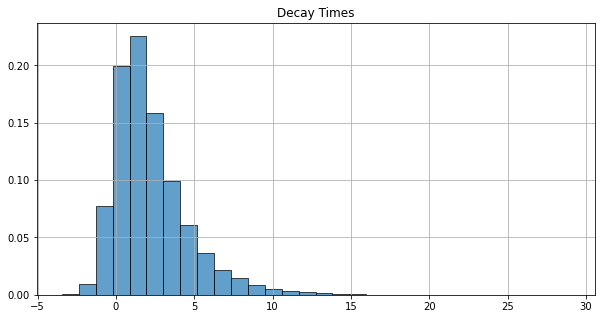

In [6]:
data = np.loadtxt("smearing_exp_data40k.txt")

plt.figure(figsize=(10, 5))
plt.hist(data, bins=30, density=True, alpha=0.7, edgecolor='black')
plt.title("Decay Times")
plt.grid()
plt.show()

### Question 2: Calculate the mean value and the standard deviation of the data.

In [7]:
mean_value = np.mean(data)
std_deviation = np.std(data)

print("Mean Value:", mean_value)
print("Standard Deviation:", std_deviation)


Mean Value: 2.2130798
Standard Deviation: 2.3850420446570664


### Question 3: Determine the mean lifetime $\tau$ of the particle and, most importantly, the time resolution $\sigma_{res}$.

### *Hint: It is not necessary to perform a fit, just use the moments. Assume that the true decay times follow an exponential PDF with mean value $\tau$, and that the true values are smeared by a Gaussian PDF with mean zero and unknown resolution $\sigma_{res}$.*

In [8]:
mean_obs = np.mean(data)
std_obs = np.std(data)
tau = mean_obs
sigma_res = np.sqrt(std_obs**2 - tau**2)

print("Mean Lifetime (tau):", tau)
print("Time Resolution (sigma_res):", sigma_res)


Mean Lifetime (tau): 2.2130798
Time Resolution (sigma_res): 0.8892150210235538


### Question 4: Calculate the Kurtosis $\mu_4/\sigma^4$ of the Gaussian PDF. For calculating the central moment $\mu_4$ use the characteristic function $\phi_G(t) =\mathrm{exp}(i\mu t - \sigma^2 t^2/2)$, not the integral.

### Kurtosis Formula:
Kurtosis is defined as:
- $\text{Kurtosis} = \frac{\mu_4}{\sigma^4}\$

The characteristic function of a Gaussian distribution with mean $( \mu )$ and standard deviation $( \sigma )$ is given by:

- $\varphi_G(t) = \exp \left( i \mu t - \frac{\sigma^2 t^2}{2} \right)\$

The fourth central moment $( \mu_4 )$ can be calculated from the characteristic function as follows:

- $\mu_4 = \frac{d^4}{dt^4} \varphi_G(t) \bigg|_{t=0}\$

For a Gaussian distribution, it is known that the fourth central moment $( \mu_4 )$ is:

- $\mu_4 = 3 \sigma^4\$

### Kurtosis of a Gaussian Distribution:
Since $( \mu_4 = 3 \sigma^4 )$ for a Gaussian distribution, the kurtosis is:

- $\text{Kurtosis} = \frac{3 \sigma^4}{\sigma^4} = 3\$


In [9]:
from scipy.stats import kurtosis

std_dev = np.std(data)

gaussian_kurtosis = 3

data_kurtosis = kurtosis(data)

print(f"Kurtosis of Gaussian distribution: {gaussian_kurtosis}")
print(f"Kurtosis of observed data: {data_kurtosis}")


Kurtosis of Gaussian distribution: 3
Kurtosis of observed data: 4.6660574582329035
